In [1]:
import mlflow
import mlflow.sklearn

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import * 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
creditos = pd.read_csv('../01.Dados/Credit.csv')
creditos

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [3]:
for col in creditos.columns:
    if creditos[col].dtype == 'object':
        creditos[col] = creditos[col].astype('category').cat.codes
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [4]:
previsores = creditos.iloc[:,0:20].values
classe = creditos.iloc[:,20].values

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.2, random_state=123)

Modelo:  6c654773813b4740ba9f48b3c6a57137


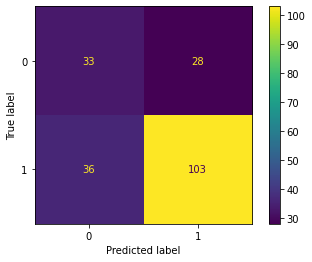

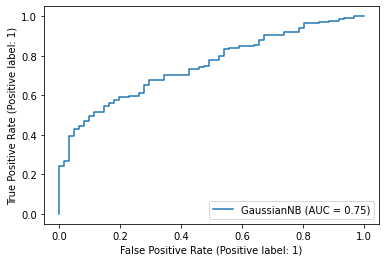

In [11]:
mlflow.set_experiment('nbexperimento') # Setar o nome de experimento para organizar

# Clásula with para definir o contexto do modelo
with mlflow.start_run():
    
    nb = GaussianNB()
    nb.fit(X_treinamento, y_treinamento)
    previsoes = nb.predict(X_teste)
    
    # Métricas
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc = roc_auc_score(y_teste, previsoes)
    log = log_loss(y_teste, previsoes)
    
    
    # Registrar métricas
    mlflow.log_metric('acuracia', acuracia)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)
    mlflow.log_metric('auc', auc)
    mlflow.log_metric('log', log)
    
    #gráficos
    confusion = plot_confusion_matrix(nb, X_teste, y_teste)
    plt.savefig('confusion.png')
    roc = plot_roc_curve(nb, X_teste, y_teste)
    plt.savefig('roc.png')
    
    #logar gráficos
    mlflow.log_artifact('confusion.png')
    mlflow.log_artifact('roc.png')    

    #modelo
    mlflow.sklearn.log_model(nb, "ModeloNB")
    
    #informaçoes da execução. Cada model executado tem um identificador unico.
    print('Modelo: ',mlflow.active_run().info.run_uuid)
    
    
mlflow.end_run()

Irá surguir em seus mlruns tags, e além disso, apenas a pasta metric irá ter o arquivo acurácia, pois nenhuma outra tag foi inserida.